**Importing Libraries and Loading the Dataset**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
housingprice = pd.read_csv('train.csv')

In [60]:
test_data = pd.read_csv('test.csv')

In [3]:
housingprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housingprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housingprice.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**SalePrice Distribution**

In [6]:
housingprice['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

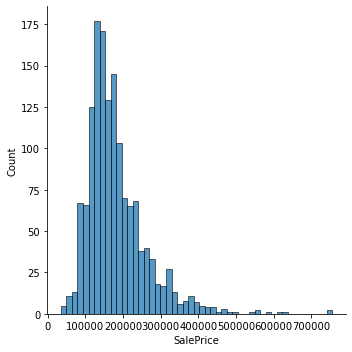

In [43]:
sns.displot(housingprice['SalePrice'])

In [8]:
corr_quant = housingprice.corr().SalePrice.sort_values(ascending = False)
corr_quant.head(16)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

In [9]:
corr_quant.tail(16)

BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [10]:
quant_col = ['SalePrice','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd']

<AxesSubplot:>

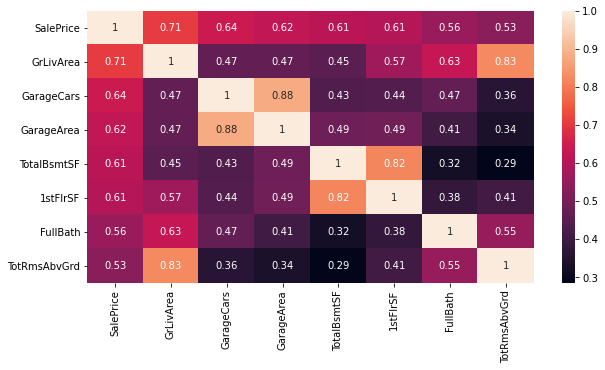

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(housingprice[quant_col].corr(), annot = True)

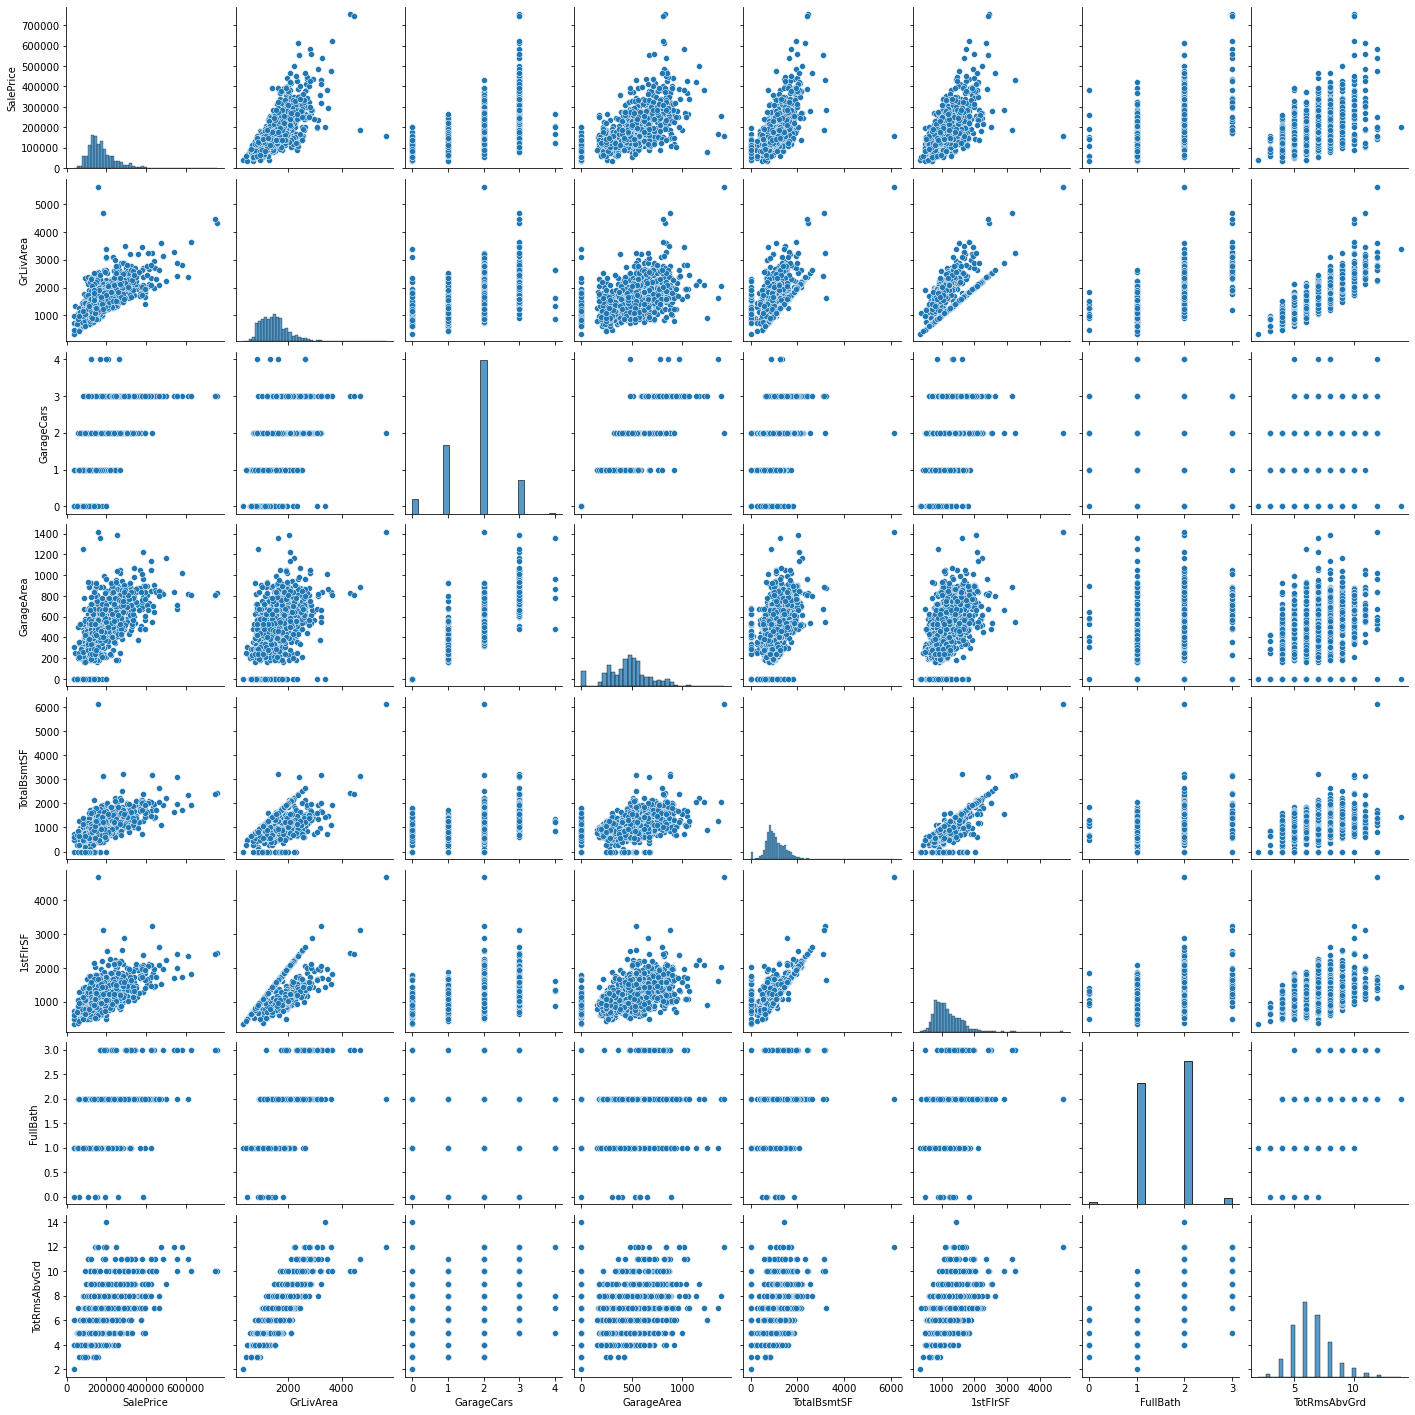

In [12]:
sns.pairplot(housingprice[quant_col])

**SalePrice and GrLivArea**

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

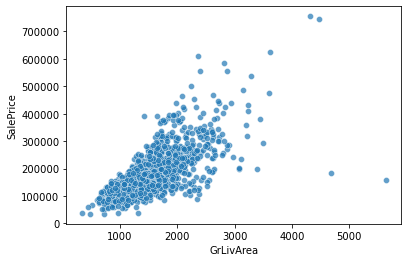

In [13]:
sns.scatterplot(y = 'SalePrice', x = 'GrLivArea', data = housingprice, alpha = 0.7)

**SalePrice and TotRmsAbvGrd**

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

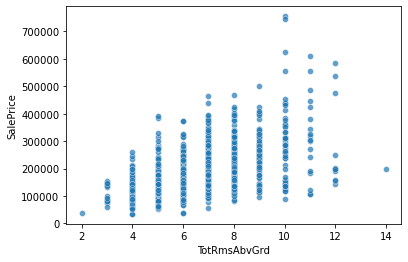

In [14]:
sns.scatterplot(y = 'SalePrice', x = 'TotRmsAbvGrd', data = housingprice, alpha = 0.7)

**SalePrice and TotalBsmtSF**

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

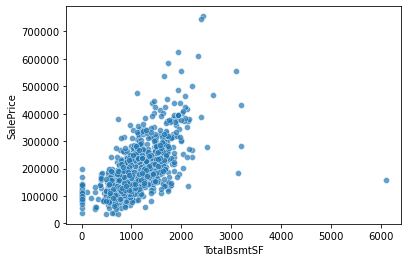

In [15]:
sns.scatterplot(y = 'SalePrice', x = 'TotalBsmtSF', data = housingprice, alpha = 0.7)

**SalePrice and YearBuilt**

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

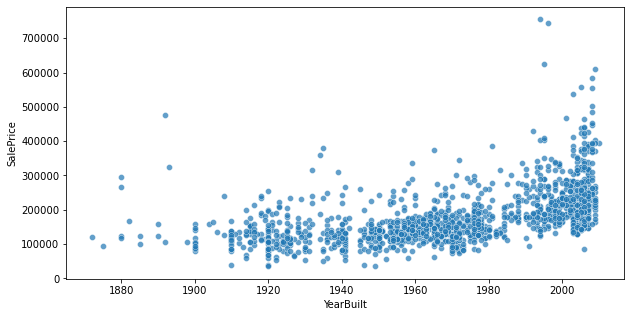

In [16]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'SalePrice', x = 'YearBuilt', data = housingprice, alpha = 0.7)

**Categorical Variables**

In [17]:
Categorical_Col = ['MSSubClass','MSZoning','OverallQual','OverallCond','Neighborhood','SalePrice','YearBuilt']

<AxesSubplot:>

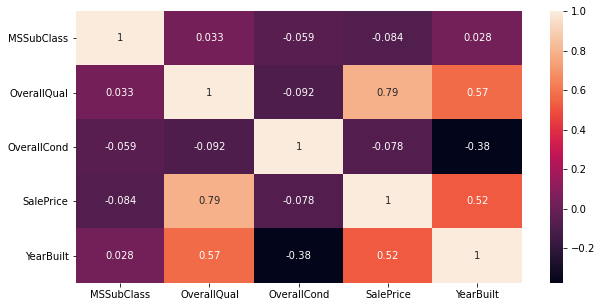

In [18]:
plt.figure(figsize = (10,5))
sns.heatmap(housingprice[Categorical_Col].corr(), annot = True)

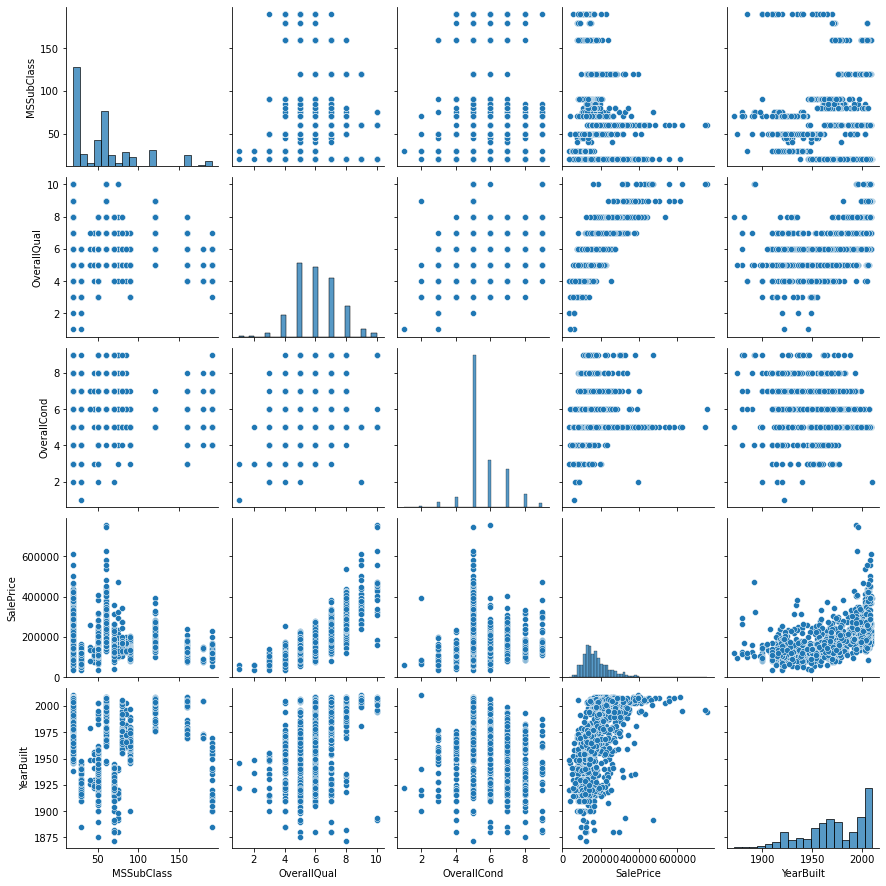

In [19]:
sns.pairplot(housingprice[Categorical_Col])

**SalePrice and OverallQual**

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

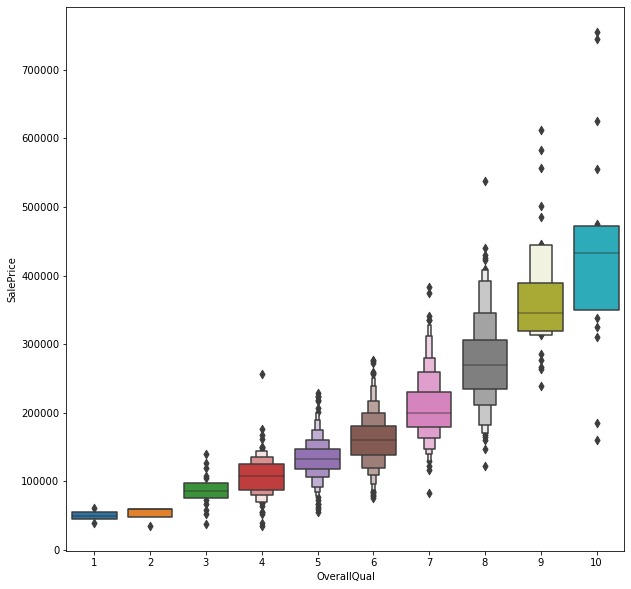

In [20]:
plt.figure(figsize=(10,10))
sns.boxenplot(x="OverallQual", y = "SalePrice", data = housingprice)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

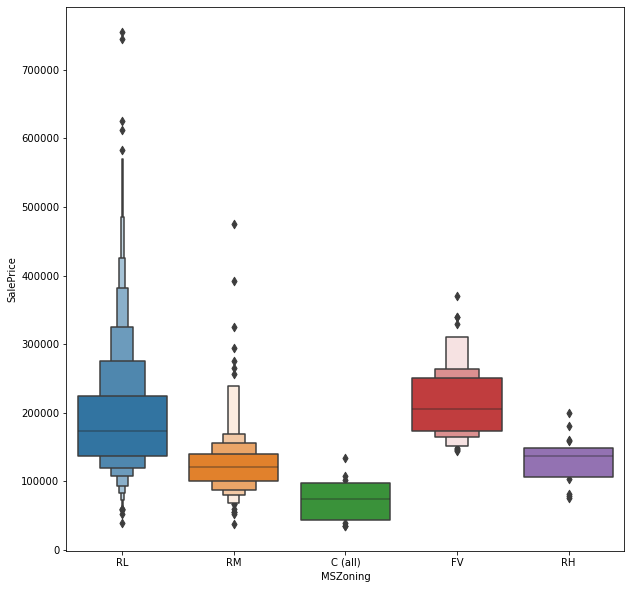

In [21]:
plt.figure(figsize=(10,10))
sns.boxenplot(x="MSZoning", y = "SalePrice", data = housingprice)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

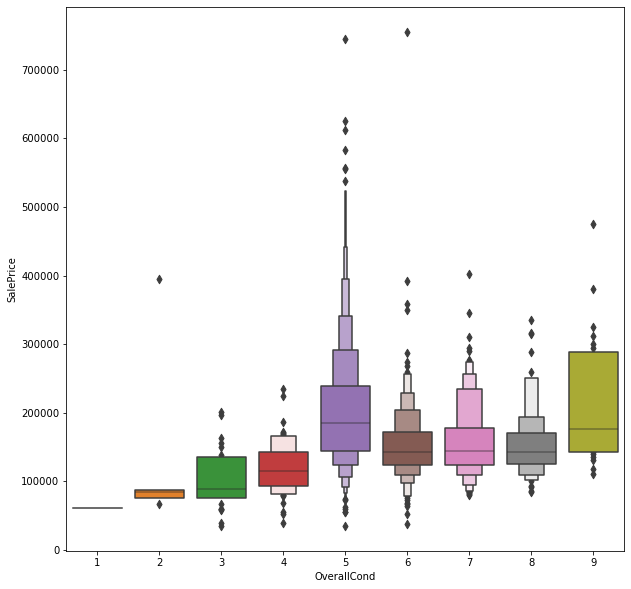

In [22]:
plt.figure(figsize=(10,10))
sns.boxenplot(x="OverallCond", y = "SalePrice", data = housingprice)

**Missing Values**

In [28]:
na_count = housingprice.isnull().sum().sort_values(ascending = False)
na_percentage = (housingprice.isnull().sum()/housingprice.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([na_count, na_percentage], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


**Drop Missing Values**

In [33]:
train_housingprice = housingprice.drop(missing_data[missing_data['Total']>=1].index,1)
train_housingprice.isnull().sum().max()

0

**Scaling and Removing Outliers**

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

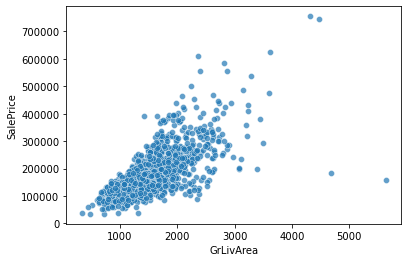

In [35]:
sns.scatterplot(y = 'SalePrice', x = 'GrLivArea', data = train_housingprice, alpha = 0.7)

In [38]:
train_housingprice = train_housingprice.drop(train_housingprice[(train_housingprice.GrLivArea > 4000) & (train_housingprice.SalePrice < 200000)].index)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

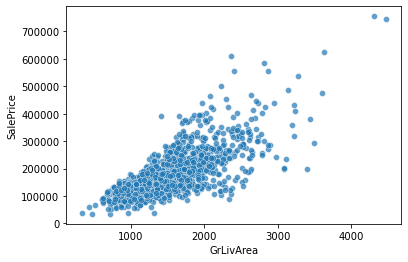

In [39]:
sns.scatterplot(y = 'SalePrice', x = 'GrLivArea', data = train_housingprice, alpha = 0.7)

**SalePrice variable: Log Transformation, Distribution and Probability Plot**

In [54]:
train_housingprice['SalePrice'] = np.log(train_housingprice['SalePrice'])

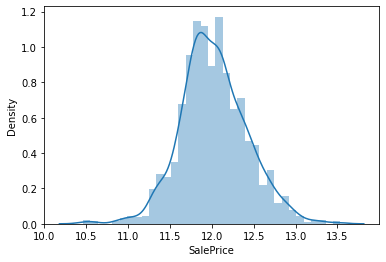

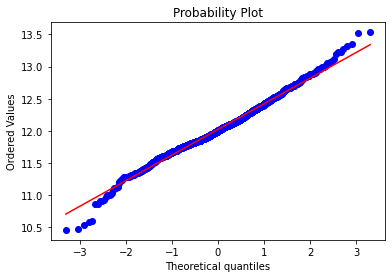

In [55]:
from scipy import stats

sns.distplot(train_housingprice['SalePrice']);
fig = plt.figure()
res = stats.probplot(train_housingprice['SalePrice'], plot=plt)

**GrLivArea variable: Log Transformation, Distribution and Probability Plot**

In [52]:
train_housingprice['GrLivArea'] = np.log(train_housingprice['GrLivArea'])

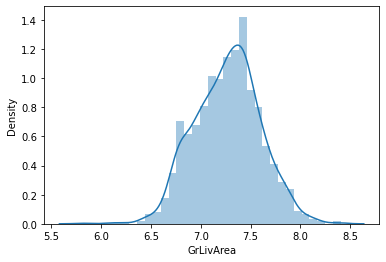

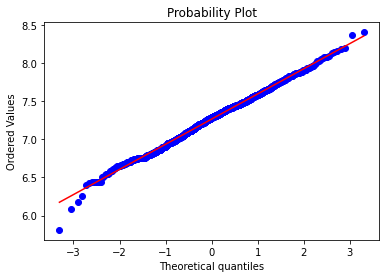

In [53]:
sns.distplot(train_housingprice['GrLivArea']);
fig = plt.figure()
res = stats.probplot(train_housingprice['GrLivArea'], plot=plt)

**TotalBsmtSF variable: Log Transformation, Distribution and Probability Plot**

In [57]:
train_housingprice['TotalBsmtSF'] = np.log(train_housingprice['TotalBsmtSF'])

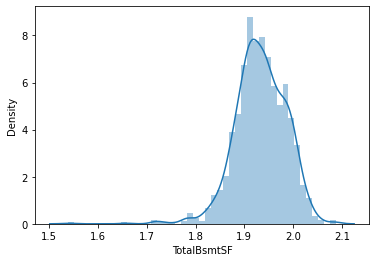

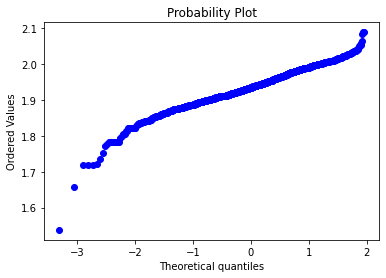

In [58]:
sns.distplot(train_housingprice['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(train_housingprice['TotalBsmtSF'], plot=plt)

**Modeling**